In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 


In [3]:
df = pd.read_csv("economic_index.csv")

In [4]:
df.head()


,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:

df.drop(columns=["Unnamed: 0", "year", "month"], axis=1 , inplace=True)


In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df.isnull().sum()


interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

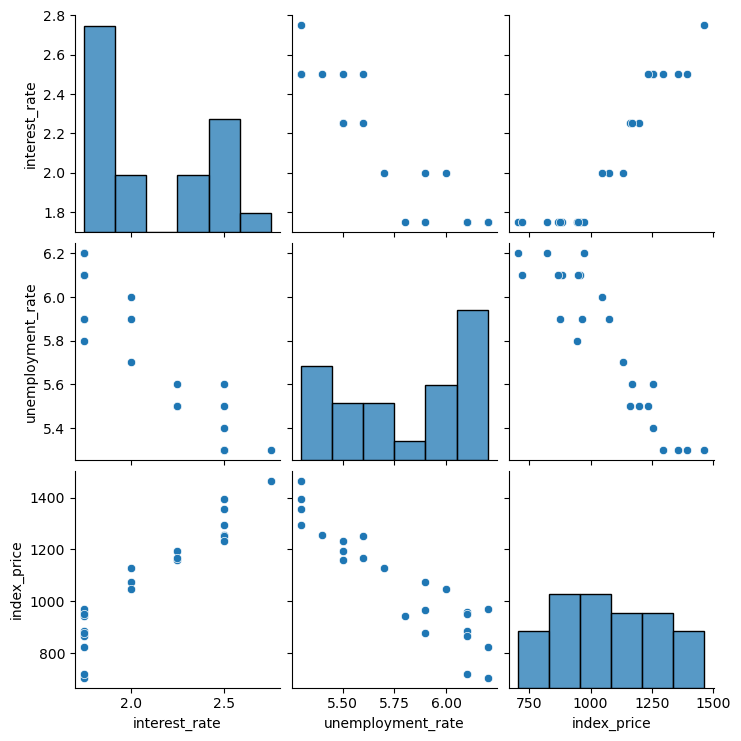

In [8]:
import seaborn as sns

sns.pairplot(df)


In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


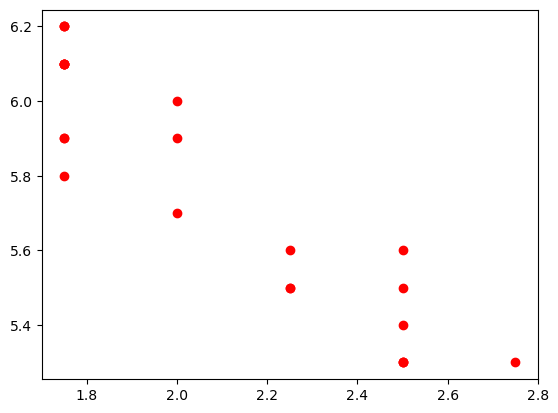

In [ ]:
plt.scatter(df['interest_rate'], df["unemployment_rate"], color="r")
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [11]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [12]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y, test_size=0.25 , random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

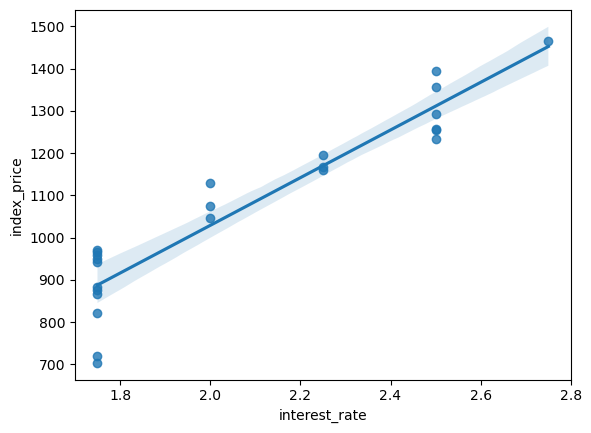

In [20]:
sns.regplot(data=df, x="interest_rate", y="index_price")

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

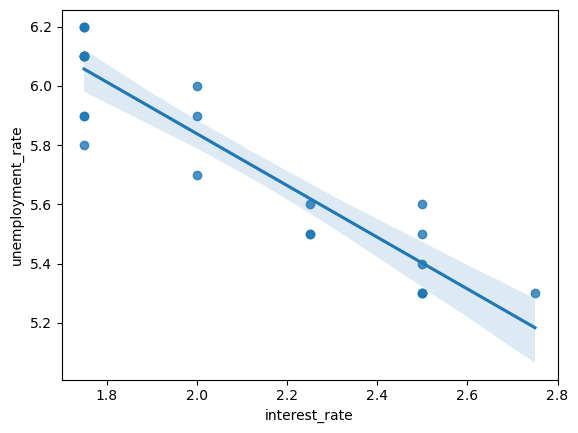

In [22]:
sns.regplot(data=df, x="interest_rate", y="unemployment_rate")

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)


In [24]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regressor, X_train , y_train, scoring="neg_mean_squared_error", cv=3 )

In [29]:
np.mean(validation_score)

np.float64(-5914.828180162388)

In [36]:
y_pred = regressor.predict(X_test)
y_pred

array([612.64375972, 487.12736973, 680.03156939, 498.75308579,
       544.07270669, 601.01804366])

In [32]:
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

print("MSE : " , mse)
print("MAE : " , mae)
print("R2 : " , r2)

MSE :  316313.1524014582
MAE :  549.3922441707887
R2 :  -8.395998348460052


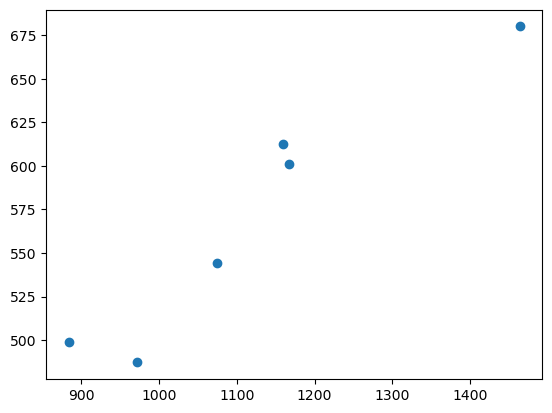

In [33]:
#Assumptions 
plt.scatter(y_test,y_pred)

In [34]:
residuals = y_test - y_pred
print(residuals)

[546.35624028 483.87263027 783.96843061 385.24691421 530.92729331
 565.98195634]


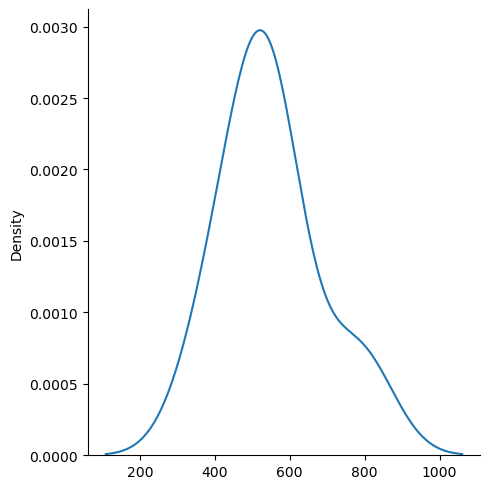

In [38]:
sns.displot(residuals, kind="kde")

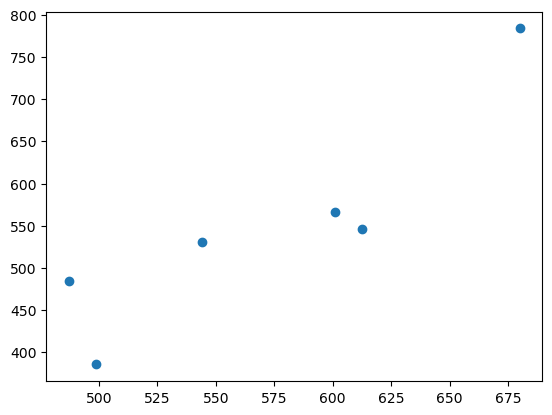

In [39]:
#scattler plot with respect to prediction and residuals 
plt.scatter(y_pred, residuals)

In [53]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()


In [54]:
prediction = model.predict(X_test)

print(prediction)

[-440.80068472 -566.31707472 -373.41287506 -554.69135865 -509.37173775
 -452.42640079]


In [56]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 15 Feb 2026   Prob (F-statistic):                       0.754
Time:                        14:46:25   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\hangu\anaconda3\envs\myenv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [57]:
print(regressor.coef_)
print(regressor.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444446
